### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

#### **Exploración de datos**

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [104]:
data = pd.read_csv('Social_Network_Ads.csv')

In [105]:
data.shape

(400, 5)

In [106]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [107]:
#Tipos de variables
#Cualitativas
#Nominal: género, estado civil, etc => object
#Ordinal: nivel socioeconómico, grado de instrucción, etc => object

#Cuantitativas
#Discreta: edad, número de visitas a un banco, etc => int
#Continua: peso, estatura, etc => float

In [108]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [110]:
#1.Análisis Univariado

#media
data['Age'].mean()

37.655

In [111]:
#mediana
data['Age'].median()

37.0

In [112]:
#moda
data['Age'].mode()

0    35
Name: Age, dtype: int64

In [113]:
#cuartiles
data['Age'].quantile()

37.0

In [114]:
data['Age'].quantile([0])

0.0    18.0
Name: Age, dtype: float64

In [115]:
data['Age'].quantile([1])

1.0    60.0
Name: Age, dtype: float64

In [116]:
data['Age'].quantile([0.25])

0.25    29.75
Name: Age, dtype: float64

In [117]:
data['Age'].quantile([0.50])

0.5    37.0
Name: Age, dtype: float64

In [118]:
data['Age'].quantile([0.75])

0.75    46.0
Name: Age, dtype: float64

In [119]:
#decil
data['Age'].quantile([0.10])

0.1    24.0
Name: Age, dtype: float64

In [120]:
data['Age'].quantile([0.20])

0.2    28.0
Name: Age, dtype: float64

In [121]:
data['Age'].quantile([0.90])

0.9    52.1
Name: Age, dtype: float64

In [122]:
#rango
data['Age'].min()

18

In [123]:
data['Age'].max()

60

In [124]:
data['Age'].max()-data['Age'].min()

42

In [125]:
#rango intercuartílico
data['Age'].quantile(0.75)-data['Age'].quantile(0.25)

16.25

In [126]:
#varianza
data['Age'].var()

109.89070175438596

In [127]:
#desviación estándar
data['Age'].std()

10.482876597307914

In [128]:
data['Age'].std(ddof=0) #poblacional

10.46976480156073

In [129]:
data['Age'].std(ddof=1) #muestral

10.482876597307914

In [130]:
#coeficiente de variación => ¿Qué variable tiene mayor dispersión?
data['Age'].std(ddof=0)/data['Age'].mean()

0.278044477534477

In [131]:
#coeficiente de asimetría
ss.skew(data['Age'])

0.23046904236325927

In [132]:
#coeficiente de curtosis
ss.kurtosis(data['Age'])

-0.6297213829600437

In [133]:
#resumen
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [134]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [135]:
#2.Análisis Bivariado
# coeficiente de correlación
# Si las variables se aproximan a una distribución normal => Pearson
# Si las variables no se aproximan a una distribución normal => Spearman
#data.corr()
#data.loc[:,['Age','EstimatedSalary']].corr(method = "pearson")
#data.loc[:,['Age','EstimatedSalary']].corr(method = "kendall")
data.loc[:,['Age','EstimatedSalary']].corr(method = "spearman")

,Age,EstimatedSalary
Age,1.000000,0.124824
EstimatedSalary,0.124824,1.000000


In [136]:
#Prueba de correlación
#Ho: las variables no están correlacionadas
#Ha: las variables están correlacionadas

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, las variables están correlacionadas
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, las variables no están correlacionadas

In [137]:
#ss.pearsonr(data['Age'],data['EstimatedSalary'])

In [138]:
ss.spearmanr(data['Age'],data['EstimatedSalary'])

SignificanceResult(statistic=0.12482434405192087, pvalue=0.01247367042800823)

In [139]:
#ss.kendalltau(data['Age'],data['EstimatedSalary'])

In [140]:
#np.corrcoef(data['Age'],data['EstimatedSalary'])

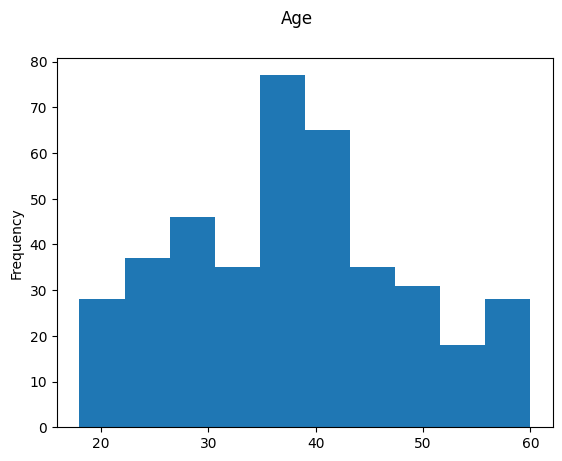

In [141]:
#3.Visualización de datos

#Histograma
data['Age'].plot(kind='hist',bins=10,title='Age',subplots=True)
plt.show()

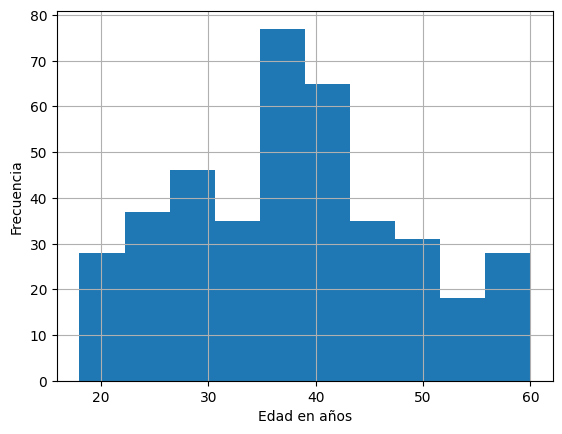

In [142]:
data['Age'].hist(bins=10)
plt.xlabel("Edad en años")
plt.ylabel("Frecuencia")
plt.show()

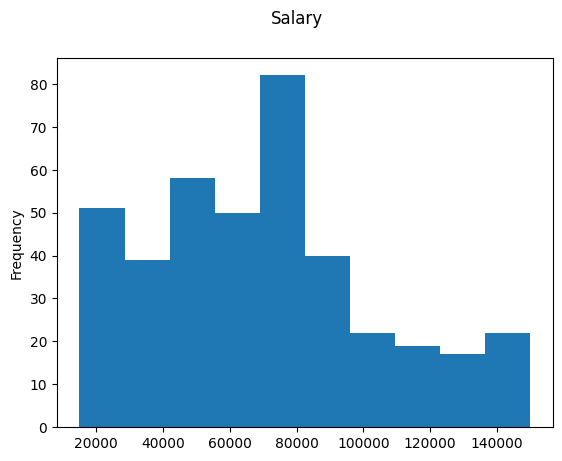

In [143]:
data['EstimatedSalary'].plot(kind='hist',bins=10,title='Salary',subplots=True)
plt.show()

<ipython-input-144-817759f36edb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'])


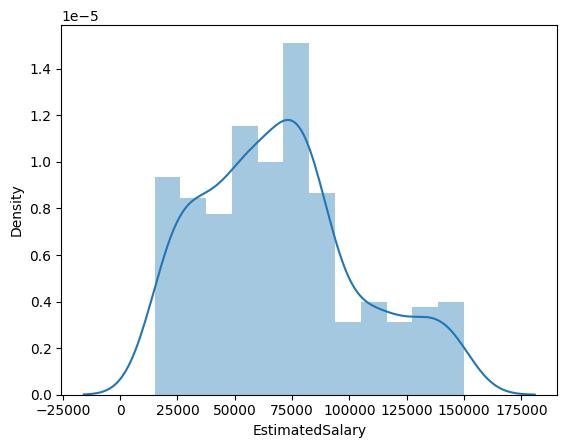

In [144]:
sns.distplot(data['EstimatedSalary'])
plt.show()

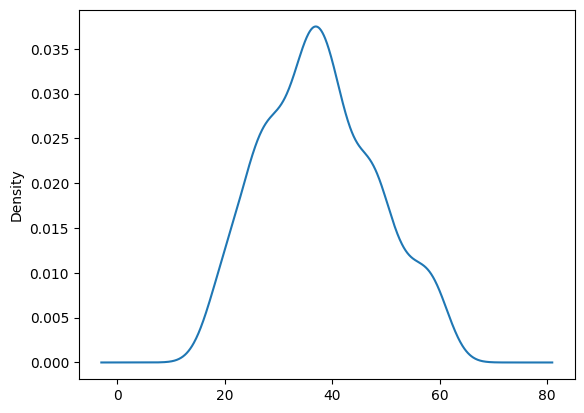

In [145]:
#Densidad
data['Age'].plot(kind='density')
plt.show()

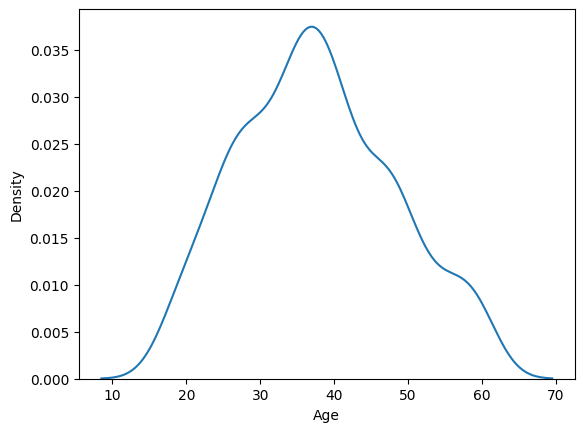

In [146]:
sns.kdeplot(data['Age'])
plt.show()

<ipython-input-147-b9b4023db8ad>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'],shade=True)


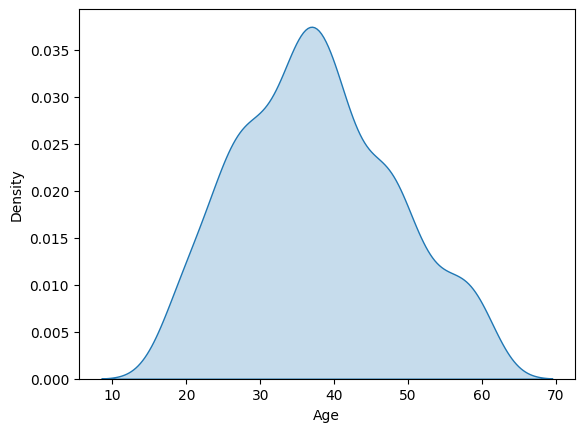

In [147]:
sns.kdeplot(data['Age'],shade=True)
plt.show()

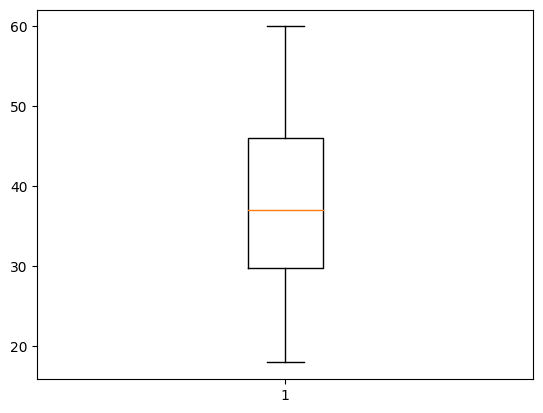

In [148]:
#Boxplot
plt.boxplot(data['Age'])
plt.show()

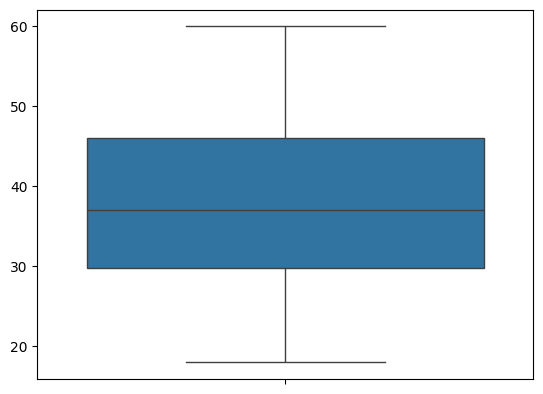

In [149]:
sns.boxplot(list(data['Age']))
plt.show()

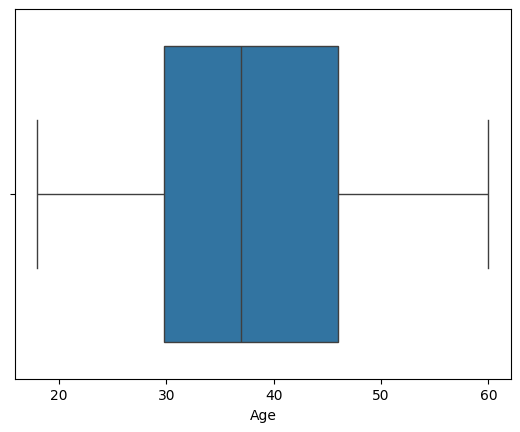

In [150]:
sns.boxplot(x='Age',data=data)
plt.show()

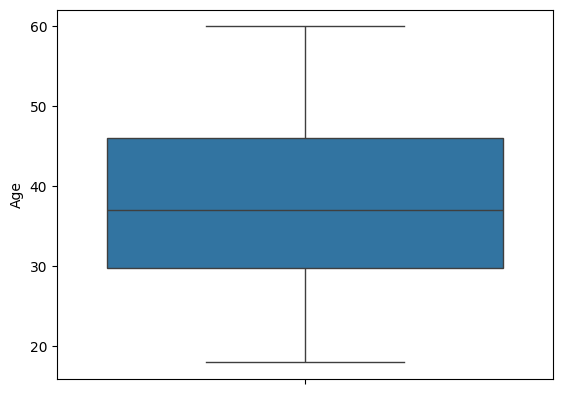

In [151]:
sns.boxplot(y='Age',data=data)
plt.show()

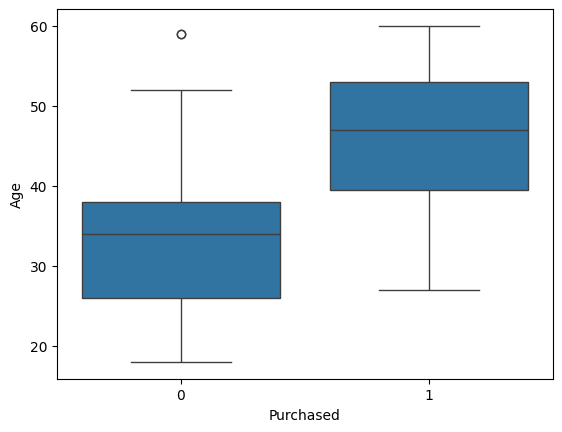

In [152]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

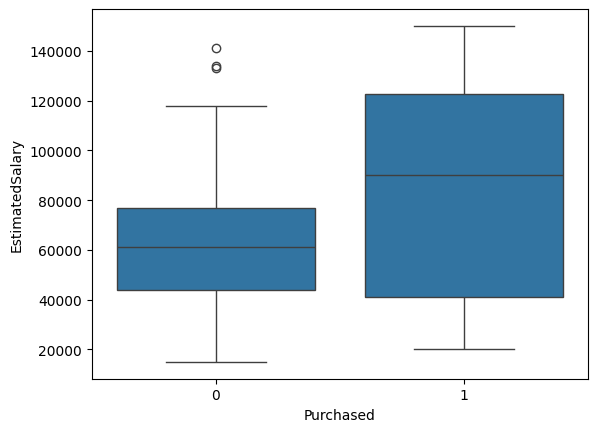

In [153]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

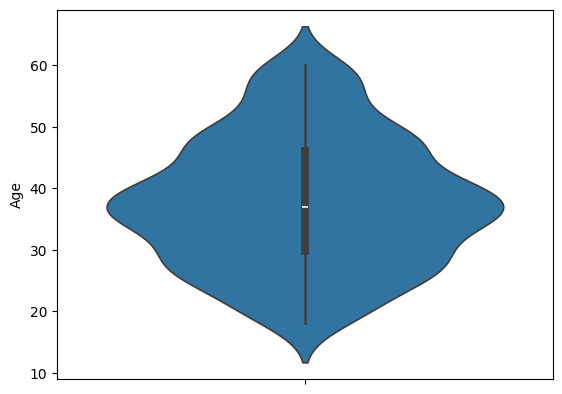

In [154]:
#Violin Plot
sns.violinplot(y='Age',data=data)
plt.show()

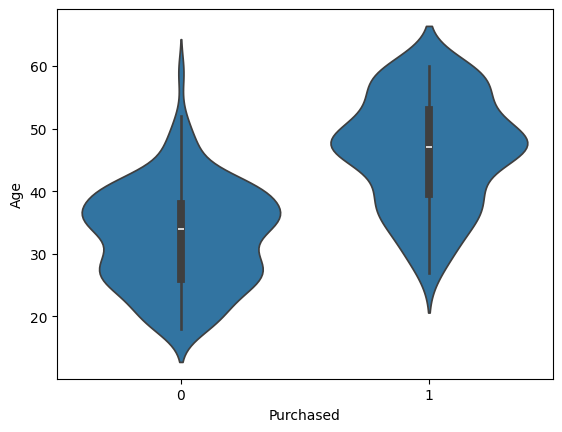

In [155]:
sns.violinplot(x='Purchased',y='Age',data=data)
plt.show()

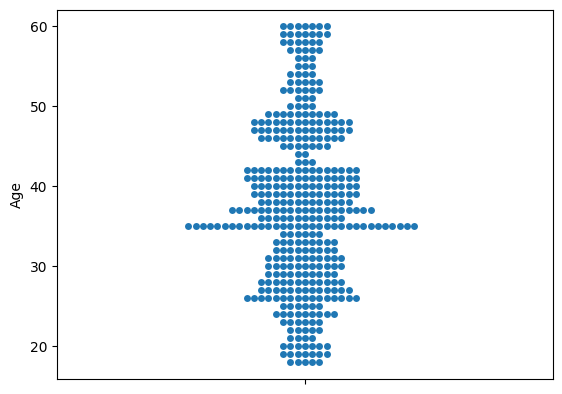

In [156]:
#Swarm Plot
sns.swarmplot(data['Age'])
plt.show()

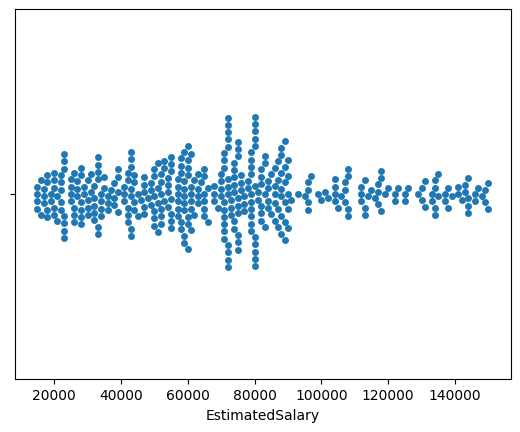

In [157]:
sns.swarmplot(x=data['EstimatedSalary'])
plt.show()

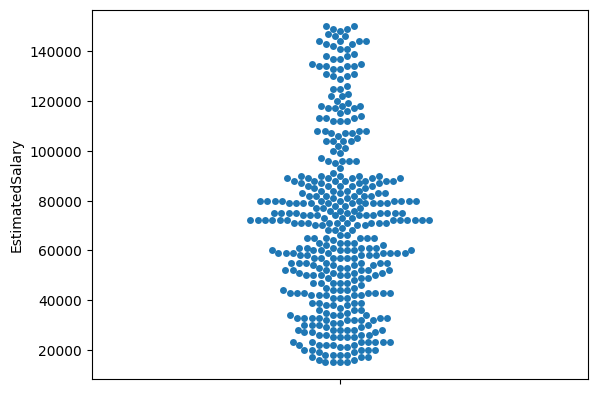

In [158]:
sns.swarmplot(y=data['EstimatedSalary'])
plt.show()

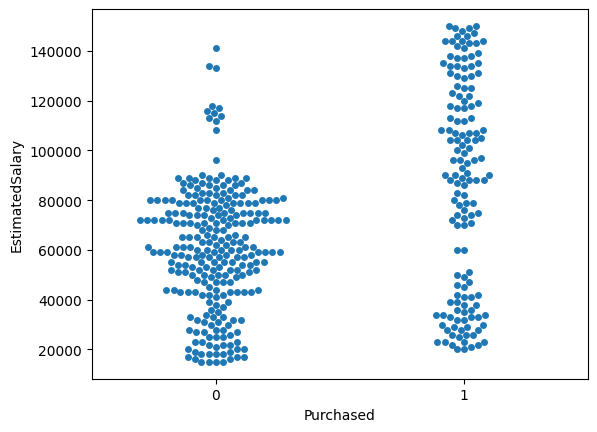

In [159]:
sns.swarmplot(y=data['EstimatedSalary'],x=data['Purchased'])
plt.show()

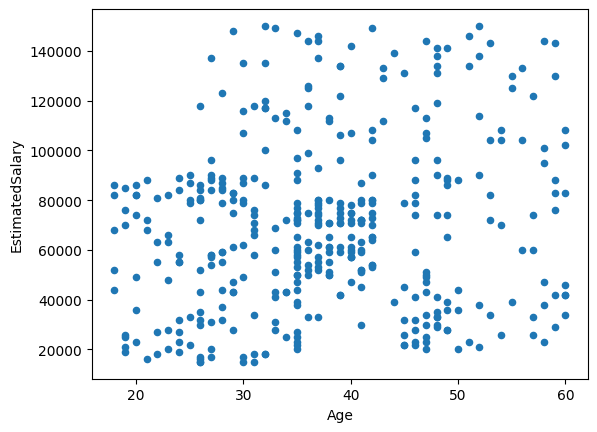

In [160]:
#Gráfico de dispersión
data.plot(kind='scatter', x='Age', y='EstimatedSalary')
plt.show()

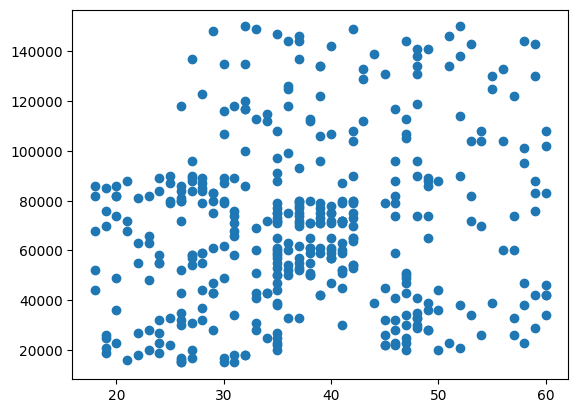

In [161]:
plt.scatter(data['Age'],data['EstimatedSalary'])
plt.show()

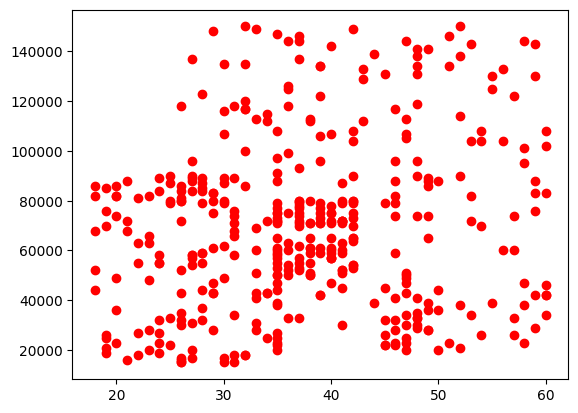

In [162]:
plt.plot(data['Age'],data['EstimatedSalary'],"ro")
plt.show()

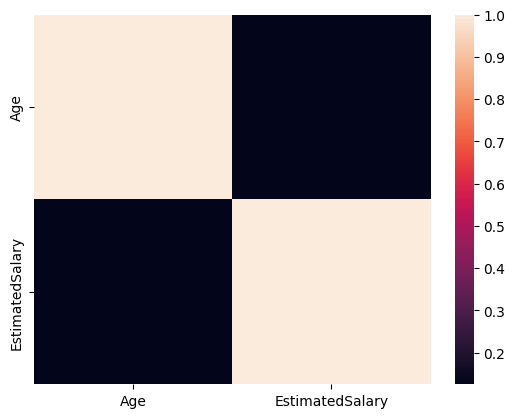

In [163]:
#Heatmap
sns.heatmap(data.loc[:,['Age','EstimatedSalary']].corr(method = "spearman"))
plt.show()

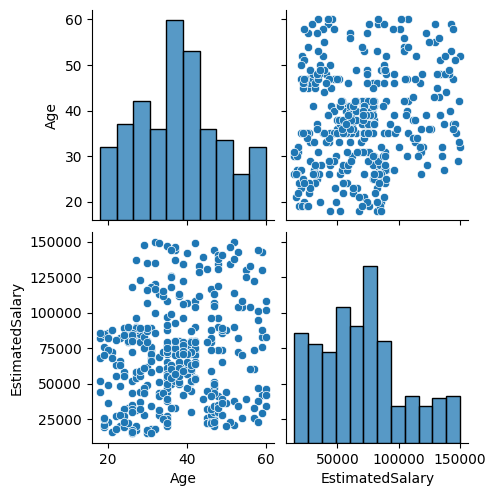

In [164]:
#Resumen
sns.pairplot(data.loc[:,['Age','EstimatedSalary']])
plt.show()

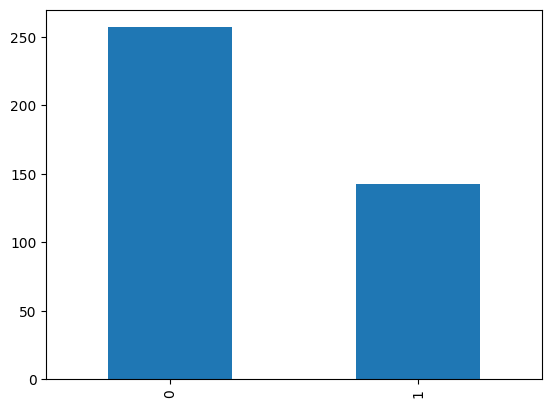

In [165]:
#Bar Chart
data['Purchased'].value_counts().plot.bar()
plt.show()

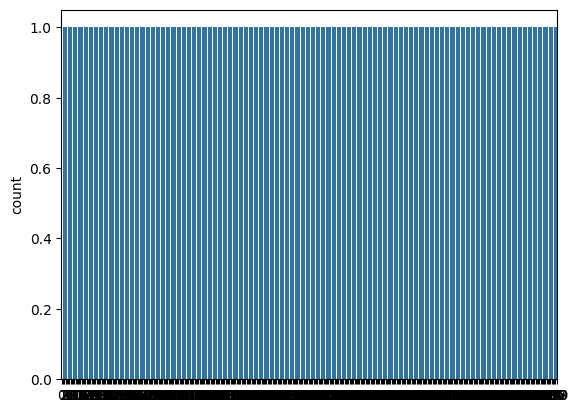

In [166]:
sns.countplot(data['Purchased'])
plt.show()

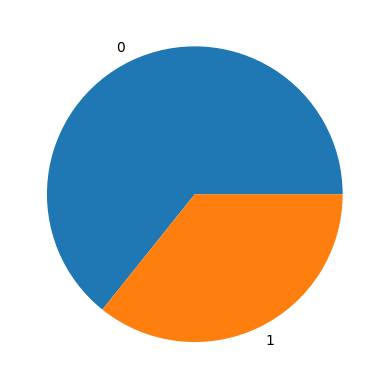

In [167]:
#Pie Chart
plt.pie(data['Purchased'].value_counts(),labels=['0','1'])
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


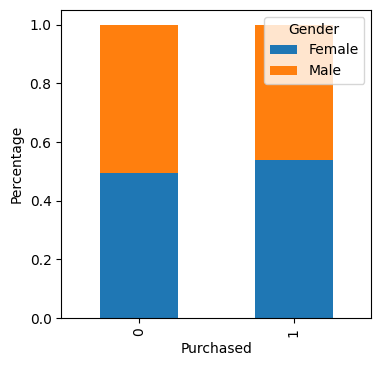

In [168]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [169]:
#Prueba Chi-Cuadrado

'''
Hipótesis nula Ho: proposiciones que niegan o refutan la relación entre variables.
Hipótesis alternativas Ha: son posibilidades diferentes o “alternas” ante las hipótesis de investigación y nula.
'''
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables

'\nHipótesis nula Ho: proposiciones que niegan o refutan la relación entre variables.\nHipótesis alternativas Ha: son posibilidades diferentes o “alternas” ante las hipótesis de investigación y nula.\n'

In [170]:
contigencia = pd.crosstab(data['Purchased'], data['Gender'])
c, p, dof, expected = chi2_contingency(contigencia)
print(p)

0.45624659183130645
